#Assumptions in multiple linear regression
- Linearity:  the relationship between the predictors and the response in linear
- Independence: Observations are independent of each other
- Homescedasticity: The residuals (difference between observed and predicted value() exhibit constant variance at all levels of the predictor.
- Normal Distribution of errors: The residuals of the model are normally distributed
- No multicollinearity: The independent variables should not be too highly coreelated with each other
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
cars = pd.read_csv("Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Description of columns
-MPG : Milege of the car(Mile per Gallon)
-HP : horse Power of the car
-VOL: Volume of the car(size)
-SP: Top speed of the car(miles per hour)
-WT: Weight of the car

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# observations
- There are no missing values
- There are 81 observations
- The data types of the columns are relevant and valid

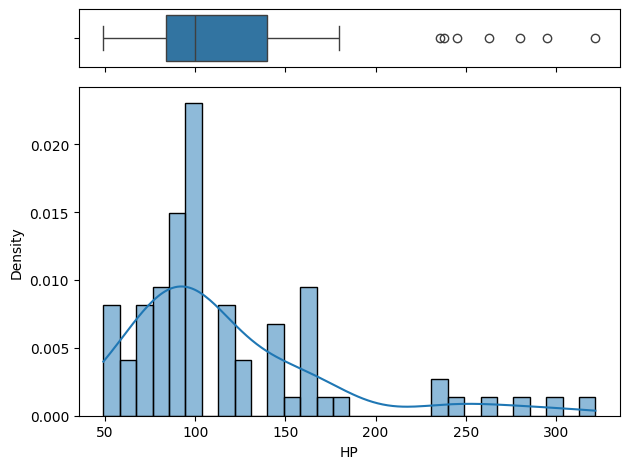

In [6]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                       gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x="HP", ax=ax_box, orient="h")
ax_box.set(xlabel='')  # Remove X label for the boxplot

# Creating a histogram with density on the same x-axis
sns.histplot(data=cars, x="HP", ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
cars[cars.duplicated()]


,HP,MPG,VOL,SP,WT


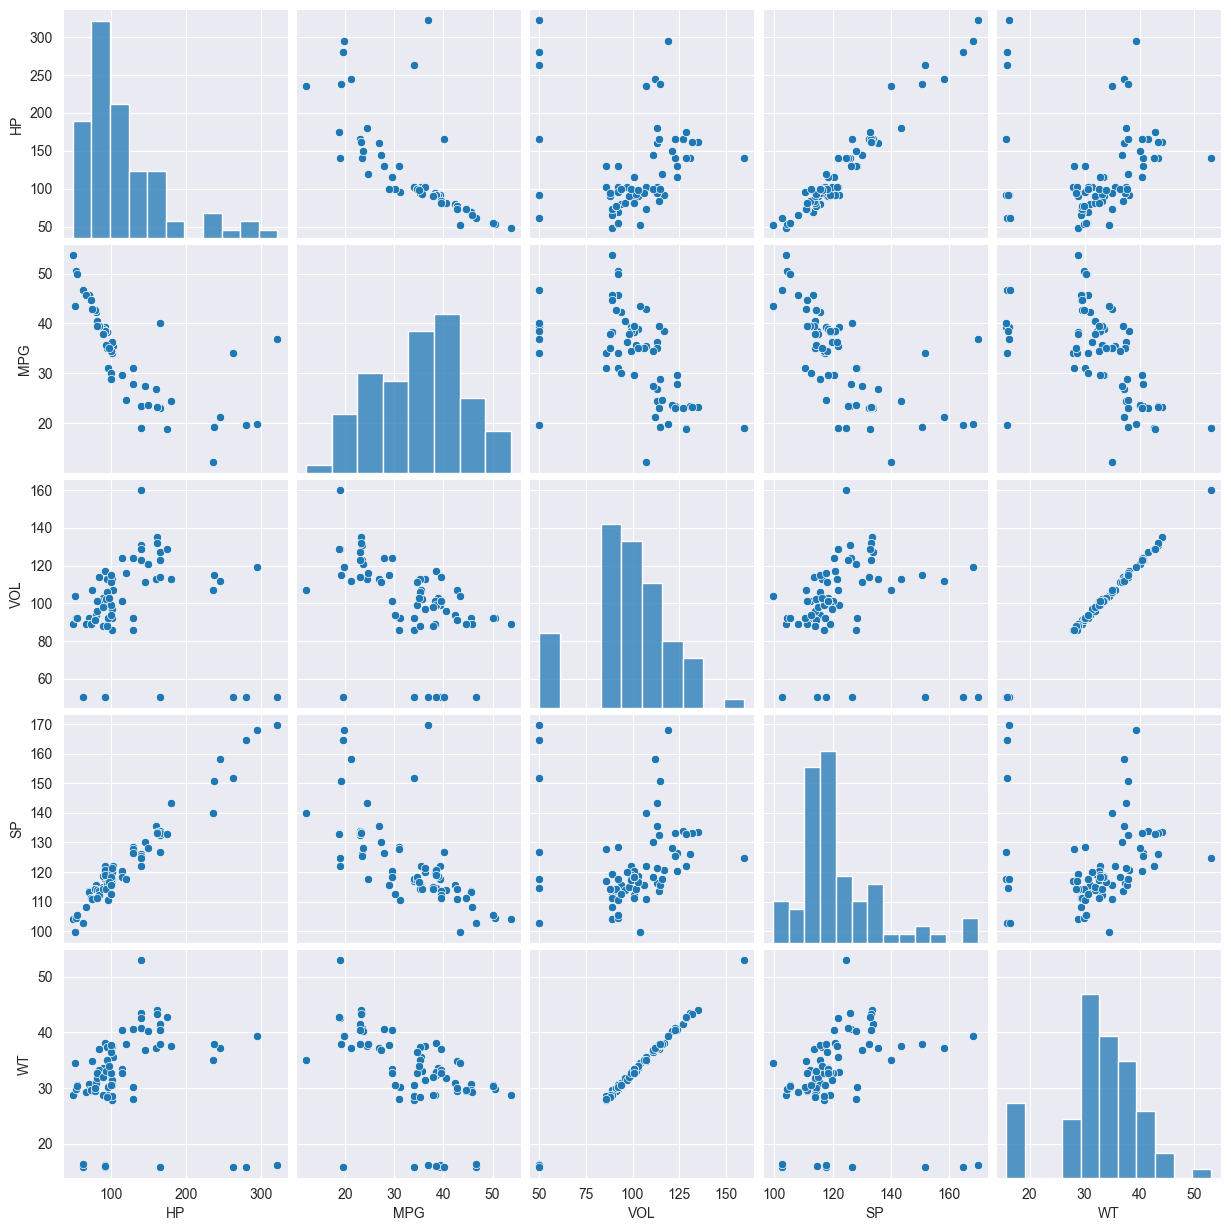

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

*Observations from boxplot and histograms*  
- There are some extreme values (outliers) observed towards the right tail of SP and HP distributions.  
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.  
- The extreme values of cars data may have come from the specially designed nature of cars.  
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


Observations from boxplot and histograms

There are some extreme values (outliers) observed towards the right tail of SP and HP distributions.
In VOL and WT columns, a few outliers are observed in both tails of their distributions.
The extreme values of cars data may have come from the specially designed nature of cars.
As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

1. *HP and SP* have a strong positive correlation (*0.9738*), indicating that higher horsepower leads to higher speed.  
2. *HP and MPG* have a strong negative correlation (-0.7250**), meaning cars with higher horsepower tend to have lower fuel efficiency.  
3. *VOL and WT* have an extremely high positive correlation (*0.9992*), showing that vehicle volume and weight are almost directly proportional.

In [10]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:35:02   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### *Observations from Model Summary*  
- The R-squared and adjusted R-squared values are good, and about 75% of the variability in *Y* is explained by *X* columns.  
- The probability value with respect to the F-statistic is close to zero, indicating that all or some of the *X* columns are significant.  
- The p-values for *VOL* and *WT* are higher than 5%, indicating some interaction issues among themselves, which need to be further explored. 

In [12]:
#find the performance matrix
# create a data frame with actual y and predicted y columns

df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [13]:
# Generate predictions using the model
pred_y1 = model.predict(cars.iloc[:, 0:4])  # Use the first 4 columns of the 'cars' DataFrame for prediction

# Ensure 'df1' exists and add the predictions to it
df1 = cars.copy()  # Assuming 'df1' is a copy of 'cars' or your desired DataFrame
df1["pred_y1"] = pred_y1  # Add predictions as a new column

# Display the first few rows to verify
df1.head()


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'WT' is not defined
    MPG~WT+VOL+SP+HP
        ^^

In [ ]:
# Make predictions
pred_y1 = model1.predict(cars.iloc[:, 0:4])
df1["pred_y1"] = pred_y1
df1.head()

In [14]:
# Compute MSE and RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

KeyError: 'pred_y1'

In [15]:
print(df1.columns)


Index(['actual_y1'], dtype='object')


In [16]:
pred_y1 = model.predict(cars.iloc[:, 0:4])  # Ensure model is defined and trained
df1["pred_y1"] = pred_y1  # This should create the column


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'WT' is not defined
    MPG~WT+VOL+SP+HP
        ^^

In [17]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639
